In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib.pyplot import figure
import matplotlib
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 40}

matplotlib.rc('font', **font)

In [3]:
%cd ../../PGGCN/weights_info

/home/ali/GBNN/PGGCN/weights_info


In [4]:
PGCN_K0 = pickle.load(open('PGCN_PG_K0_W.pkl', 'rb'))
PGNN_K0 = pickle.load(open('PGNN_PG_K0.pkl', 'rb'))

2023-10-24 16:10:29.750156: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [40]:
pgcn_w_s_mean = np.abs(PGCN_K0[0].numpy()).mean(1)
pgcn_w_s_std = np.abs(PGCN_K0[0].numpy()).std(1)

pgnn_w_s_mean = np.abs(PGNN_K0[0].numpy()).mean(1)
pgnn_w_s_std = np.abs(PGNN_K0[0].numpy()).std(1)

In [41]:
# Carbon Nitrogen Oxygen Sulfur Fluorine degree 0 degree 1 degree 2 implicit valence 0 implicit valence 1 implicit valence 2 # electrons charge
pgnn_indexes = [0, 1, 2, 3, 4, 45, 46, 47, 56, 57, 58, 62, 63]
pgcn_indexes = [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 18, 19]
pgnn_w_s_selected_mean = np.abs(pgnn_w_s_mean[pgnn_indexes])
pgcn_w_s_selected_mean = np.abs(pgcn_w_s_mean[pgcn_indexes])
pgnn_w_s_selected_std = np.abs(pgnn_w_s_std[pgnn_indexes])
pgcn_w_s_selected_std = np.abs(pgcn_w_s_std[pgcn_indexes])

In [42]:
features = ['Carbon', 'Nitrogen', 'Oxygen', 'Sulfur', 'Fluorine', 'Degree 0', 'Degree 1', 'Degree 2',
    'implicit valence 0', 'implicit valence 1', 'implicit valence 2', '# electrons', 'charge']

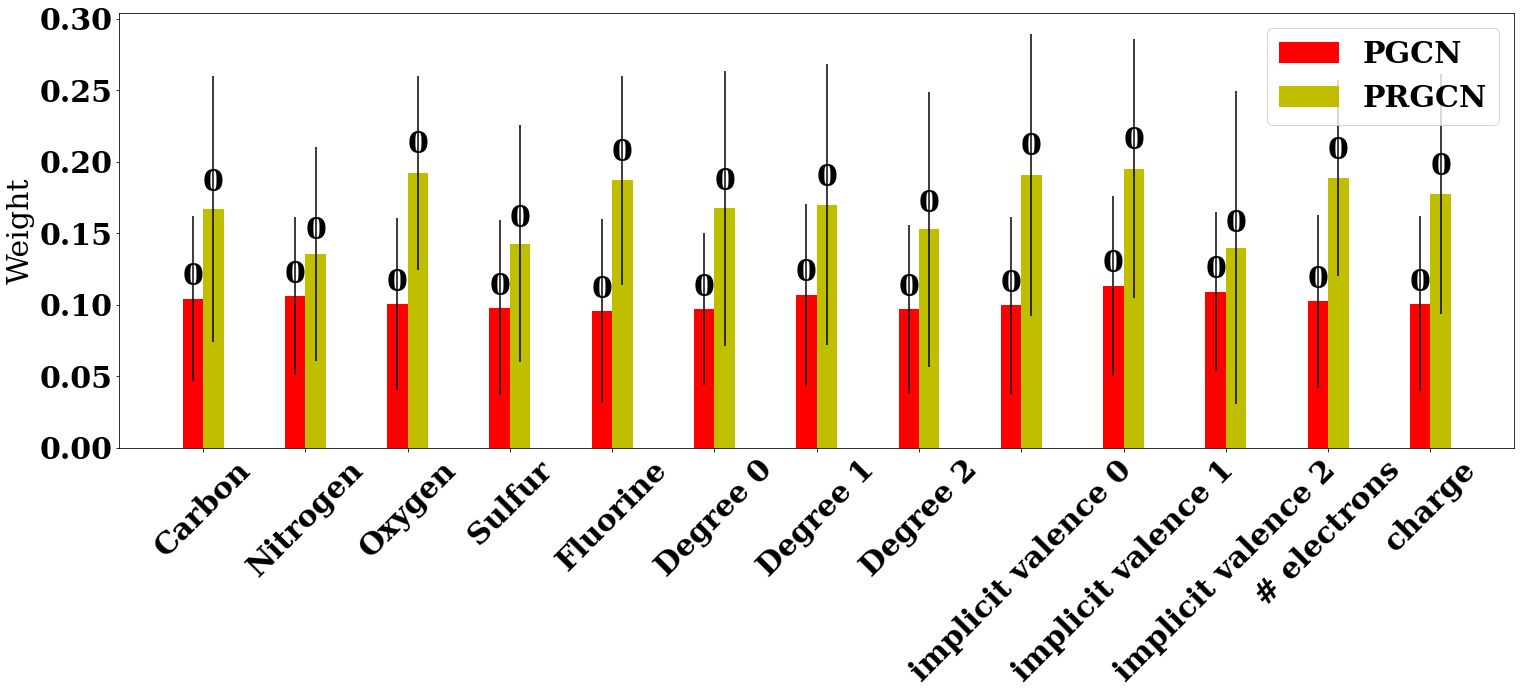

In [35]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 30}

matplotlib.rc('font', **font)
N = 13


ind = np.arange(N)  # the x locations for the groups
width = 0.20       # the width of the bars

fig, ax = plt.subplots(figsize =(25, 8))
rects1 = ax.bar(ind, pgnn_w_s_selected_mean, width, color='r', yerr=pgnn_w_s_selected_std)


rects2 = ax.bar(ind + width, pgcn_w_s_selected_mean, width, color='y', yerr=pgcn_w_s_selected_std)

# add some text for labels, title and axes ticks

ax.set_ylabel('Weight')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(features, rotation=45)

ax.legend((rects1[0], rects2[0]), ('PGCN', 'PRGCN'))


# def autolabel(rects):
#     """
#     Attach a text label above each bar displaying its height
#     """
#     for rect in rects:
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2, 1.05*height,
#                 '%d' % int(height),
#                 ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

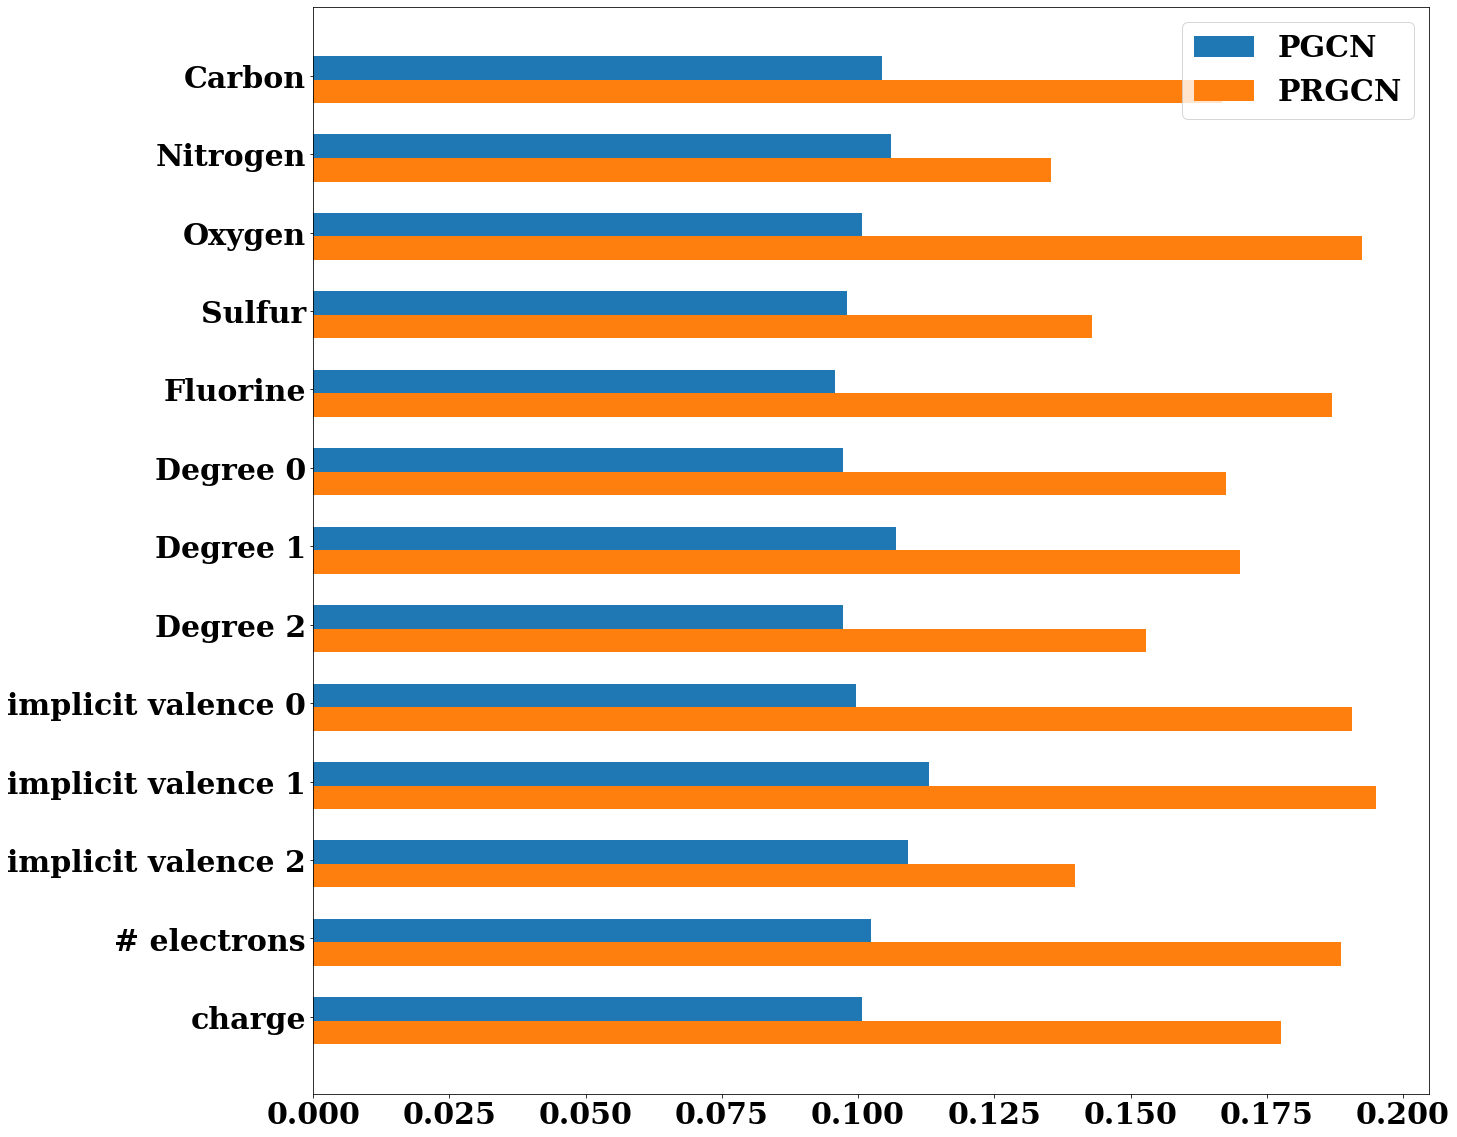

In [105]:
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 30}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize =(20, 20))
y_pos = np.arange(len(features))

ax.barh(y_pos, np.abs(pgnn_w_s_selected_mean), 0.5, label='PGCN')
ax.barh(y_pos + 0.2, np.abs(pgcn_w_s_selected_mean), 0.3, label='PRGCN')
ax.set_yticks(y_pos, labels=features)

ax.invert_yaxis()
plt.legend()
plt.savefig('coeffs (1).png')
plt.show()